# Customer Segmentation System :- Model Training

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib



# load cleaned dataset (update path if different)
DATA_PATH = "data/processed/customer_cleaned.csv"
df = pd.read_csv(DATA_PATH)

print("Loaded shape:", df.shape)
df.head()


Loaded shape: (19755, 30)


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Family_Size,Total_Spending,Total_Purchases,Customer_For_Days
0,4297,Graduation,Married,23228.0,1,0,71,13,2,18,...,0,0,0,0,0,56,2,40,5,154
1,2811,PhD,Single,48918.0,1,1,21,52,0,9,...,0,0,0,0,0,62,3,62,5,78
2,3412,Master,Married,67381.0,0,1,67,815,8,53,...,0,0,0,0,0,74,2,957,13,530
3,9964,Graduation,Single,61825.0,0,1,56,162,50,100,...,0,0,0,0,0,46,2,424,14,326
4,10785,Graduation,Married,44078.0,1,1,17,24,1,10,...,0,0,0,0,0,56,3,41,5,10


In [2]:
# Selecting numeric, business-relevant features for clustering
features = [
    "Age", "Income", "Recency", "Total_Spending", "Total_Purchases",
    "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",
    "Children", "Family_Size", "Customer_For_Days"
]

 
selected = [c for c in features if c in df.columns]
print("Using features:", selected)

X = df[selected].copy()
X.shape


Using features: ['Age', 'Income', 'Recency', 'Total_Spending', 'Total_Purchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Family_Size', 'Customer_For_Days']


(19755, 10)

In [3]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,19755.0,56.023488,11.679803,29.0,47.0,55.0,66.0,85.0
Income,19755.0,51426.827740,20343.232023,1730.0,35416.0,51518.0,68092.0,93790.0
Recency,19755.0,48.933080,28.736463,0.0,25.0,49.0,74.0,99.0
Total_Spending,19755.0,603.963857,600.575051,5.0,69.0,396.0,1042.5,2525.0
Total_Purchases,19755.0,12.503164,7.150158,0.0,6.0,12.0,18.0,32.0
NumWebPurchases,19755.0,4.089901,2.773232,0.0,2.0,3.0,6.0,27.0
NumCatalogPurchases,19755.0,2.622577,2.783486,0.0,0.0,2.0,4.0,28.0
NumStorePurchases,19755.0,5.790686,3.212083,0.0,3.0,5.0,8.0,13.0
Family_Size,19755.0,1.952417,0.748502,1.0,1.0,2.0,2.0,4.0
Customer_For_Days,19755.0,353.668641,202.841049,0.0,180.0,353.0,529.0,699.0


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

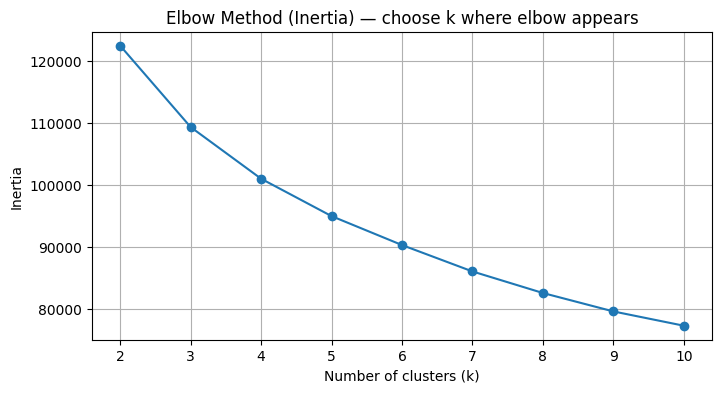

In [5]:
# Elbow method  k=2..10
inertia = []
K_RANGE = range(2, 11)

for k in K_RANGE:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(list(K_RANGE), inertia, marker='o')
plt.xticks(list(K_RANGE))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method (Inertia) — choose k where elbow appears")
plt.grid(True)
plt.show()


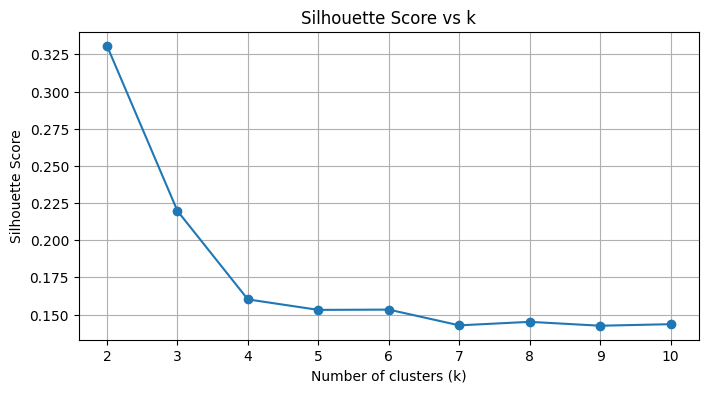

k=2 -> silhouette=0.3308
k=3 -> silhouette=0.2197
k=4 -> silhouette=0.1602
k=5 -> silhouette=0.1531
k=6 -> silhouette=0.1533
k=7 -> silhouette=0.1427
k=8 -> silhouette=0.1451
k=9 -> silhouette=0.1425
k=10 -> silhouette=0.1435


In [6]:
# Silhouette score for k=2..10
sil_scores = []
for k in K_RANGE:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(8,4))
plt.plot(list(K_RANGE), sil_scores, marker='o')
plt.xticks(list(K_RANGE))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.grid(True)
plt.show()

# Print values for quick reading
for k, s in zip(K_RANGE, sil_scores):
    print(f"k={k} -> silhouette={s:.4f}")


In [7]:
BEST_K = 4    
kmeans = KMeans(n_clusters=BEST_K, random_state=42, n_init=20)
cluster_labels = kmeans.fit_predict(X_scaled)

In [8]:
df["cluster"] = cluster_labels

# Basic counts
print(df["cluster"].value_counts().sort_index())

centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids, columns=selected)
centroids_df["cluster"] = centroids_df.index
centroids_df


cluster
0    5349
1    4842
2    5352
3    4212
Name: count, dtype: int64


,Age,Income,Recency,Total_Spending,Total_Purchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Family_Size,Customer_For_Days,cluster
0,47.996822,29476.093102,47.548514,92.396710,5.614133,2.049916,0.474107,3.090110,1.818658,346.232006,0
1,56.280669,75489.591491,50.545023,1410.728831,19.739983,4.994424,6.287691,8.457869,1.182569,346.664601,1
2,59.762332,58332.342115,47.264761,759.850897,17.441891,6.684604,2.930306,7.826981,2.069133,420.367713,2
3,61.170465,42866.586657,50.958215,128.111349,6.657170,2.343780,0.746676,3.566714,2.858974,286.412868,3


In [9]:
profile = df.groupby("cluster")[selected].mean().round(2)
profile["count"] = df.groupby("cluster").size()
profile = profile.sort_values("count", ascending=False)
profile


,Age,Income,Recency,Total_Spending,Total_Purchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Family_Size,Customer_For_Days,count
cluster,,,,,,,,,,,
2,59.76,58332.34,47.26,759.85,17.44,6.68,2.93,7.83,2.07,420.37,5352
0,48.00,29476.09,47.55,92.40,5.61,2.05,0.47,3.09,1.82,346.23,5349
1,56.28,75489.59,50.55,1410.73,19.74,4.99,6.29,8.46,1.18,346.66,4842
3,61.17,42866.59,50.96,128.11,6.66,2.34,0.75,3.57,2.86,286.41,4212


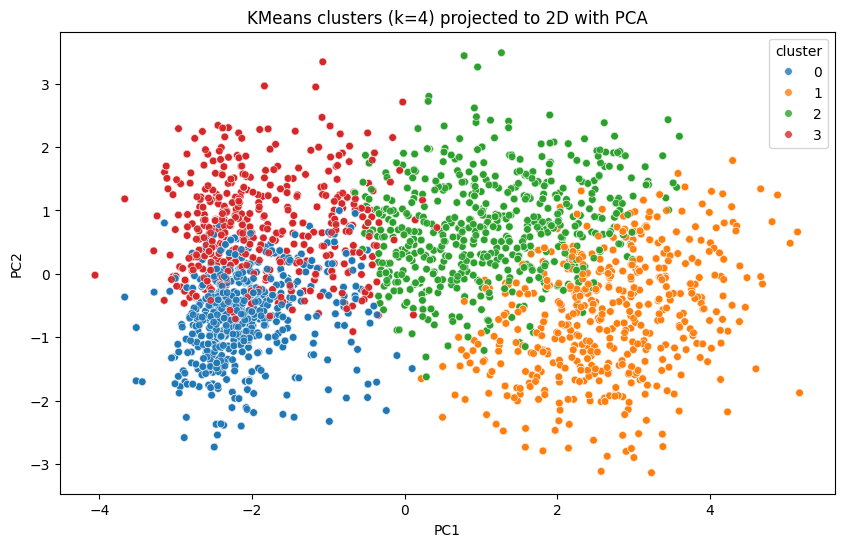

Explained variance ratio: [0.472 0.113]
Total explained by 2 PCs: 0.585


In [10]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters in PCA-space
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette="tab10", s=30, alpha=0.8)
plt.title(f"KMeans clusters (k={BEST_K}) projected to 2D with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="cluster")
plt.show()

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_.round(3))
print("Total explained by 2 PCs:", pca.explained_variance_ratio_.sum().round(3))
